In [1]:
import tensorflow as tf

In [2]:
tf.set_random_seed(777)

In [3]:
x_data = [[1, 2, 1, 1],
         [2, 1, 3, 2],
         [3, 1, 3, 4],
         [4, 1, 5, 5],
         [1, 7, 5, 5],
         [1, 2, 5, 6],
         [1, 6, 6, 6],
         [1, 7, 7, 7]]
y_data = [[0, 0, 1],
         [0, 0, 1],
         [0, 0, 1],
         [0, 1, 0],
         [0, 1, 0],
         [0, 1, 0],
         [1, 0, 0],
         [1, 0, 0]]

In [4]:
X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

In [5]:
W = tf.Variable(tf.random_normal([4, nb_classes]), name = "Weight")
b = tf.Variable(tf.random_normal([nb_classes]), name = 'bias')

In [6]:
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [7]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [10]:
Cost_val = []
Steps = []

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        val, cost_val = sess.run([optimizer, cost], feed_dict = {X : x_data, Y : y_data})
        Cost_val.append(cost_val)
        Steps.append(step)
        if step % 200 == 0:
            print(step, cost_val)
    
    print("---------------")
    a = sess.run(hypothesis, feed_dict = {X : [[1, 11, 7, 9]]})
    print(a, sess.run(tf.argmax(a, 1)))
    print("Result : ", sess.run(tf.argmax(a, 1)))
    
    print("---------------")
    b = sess.run(hypothesis, feed_dict = {X : [[1, 3, 4, 3]]})
    print(b, sess.run(tf.argmax(b, 1)))
    print("Result : ", sess.run(tf.argmax(b, 1)))
    
    print("---------------")
    c = sess.run(hypothesis, feed_dict = {X : [[1, 1, 0, 1]]})
    print(c, sess.run(tf.argmax(c, 1)))
    print("Result : ", sess.run(tf.argmax(c, 1)))
    
    print("---------------")
    all = sess.run(hypothesis, feed_dict = {X : [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.argmax(all, 1)))

0 6.926112
200 0.6005015
400 0.47295797
600 0.37342912
800 0.28018364
1000 0.23280509
1200 0.21065351
1400 0.1922989
1600 0.17682323
1800 0.16359545
2000 0.15216151
---------------
[[1.3890412e-03 9.9860197e-01 9.0613094e-06]] [1]
Result :  [1]
---------------
[[0.9311922  0.06290191 0.0059059 ]] [0]
Result :  [0]
---------------
[[1.2732815e-08 3.3411290e-04 9.9966586e-01]] [2]
Result :  [2]
---------------
[[1.3890412e-03 9.9860197e-01 9.0612930e-06]
 [9.3119222e-01 6.2901914e-02 5.9059025e-03]
 [1.2732815e-08 3.3411290e-04 9.9966586e-01]] [1 0 2]


In [15]:
import matplotlib.pyplot as plt

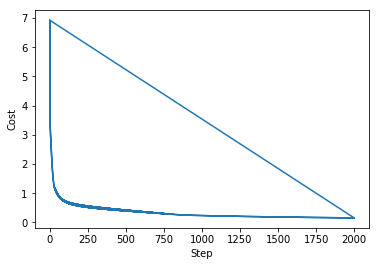

In [20]:
plt.plot(Steps, Cost_val)
plt.xlabel('Step')
plt.ylabel('Cost')
plt.show()